<a href="https://colab.research.google.com/github/gama595/TechChallengeFase1/blob/main/TechChallengeFase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

import numpy as np
np.random.seed(42)

import seaborn as sns
insurance_full = pd.read_csv("drive/MyDrive/COLAB/insurance.csv")

#insurance_full = pd.read_csv("insurance.csv")

#Explorando os dados

In [ ]:
insurance_full.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Podemos observar que há dados não numéricos e que não seguem uma mesma escala, portanto precisaremos transformá-los e normalizá-los ou padronizá-los

In [ ]:
insurance_full.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [ ]:
#Verificar se existe valores nulos
insurance_full.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_full.shape

(1338, 7)

In [ ]:
insurance_full.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos observar que não há dados nulos, portanto nada a fazer nesse sentido

In [ ]:
insurance_full['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

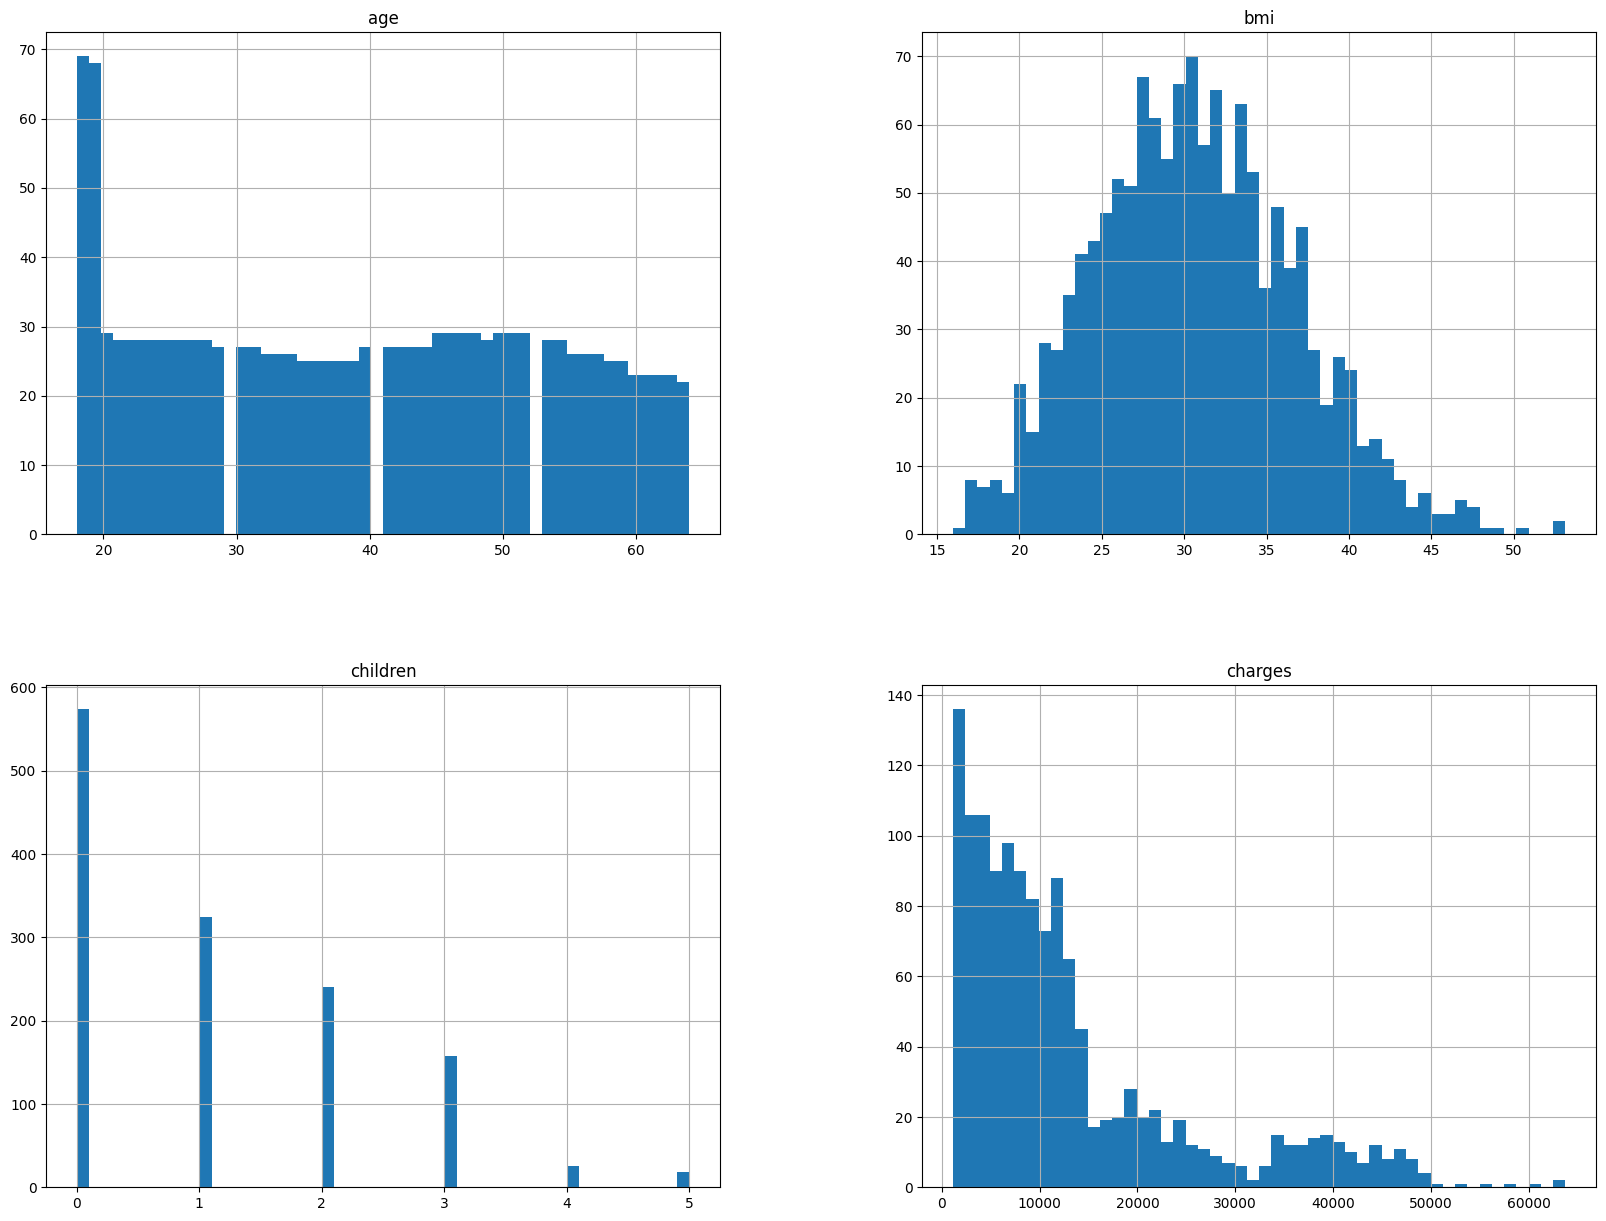

In [ ]:
import matplotlib.pyplot as plt
insurance_full.hist(bins=50, figsize=(20,15))

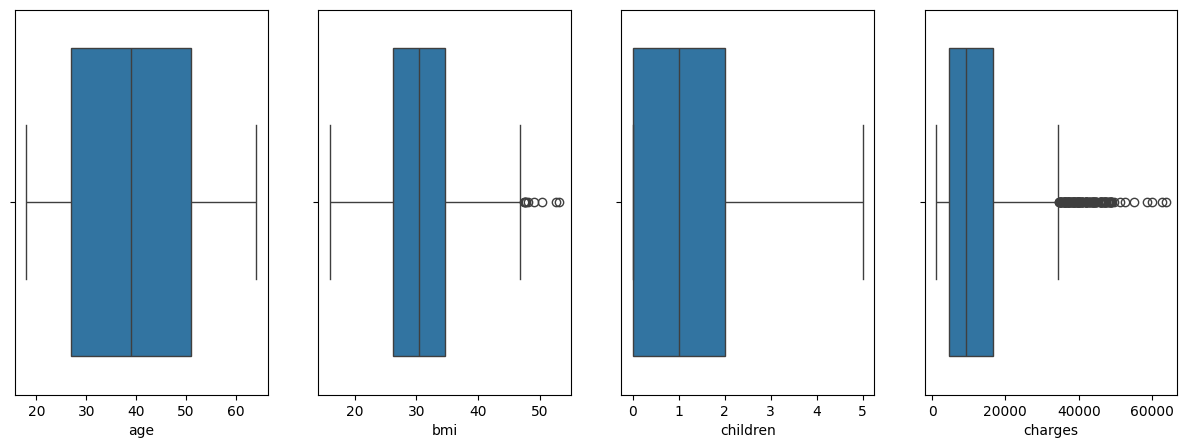

In [ ]:
# Cria uma figura e um array de subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Define as variáveis
variaveis = ['age', 'bmi', 'children', 'charges']

# Gera um boxplot para cada variável em um subplot diferente
for i, var in enumerate(variaveis):
  sns.boxplot(data=insurance_full, x=var, ax=axes[i])

Na coluna idade podemos notar um grupo de outliers. Para a coluna encargos, nosso target, temos alta concentração de dados entre 0 e 10000, um padrão similar até 50000 e alguns outliers acima disso.

In [ ]:
def get_weight_status(bmi):
    if bmi < 18.5:
        status = "Abaixo do peso"
    elif bmi < 25:
        status = "Normal"
    elif bmi < 30:
        status = "Sobrepeso"
    else:
        status = "Obeso"
    return status

insurance_full['weight_status'] = insurance_full['bmi'].apply(get_weight_status)

Utilizamos o IMC para classificar o peso das pessoas em diferentes categorias, como "Abaixo do peso", "Normal", "Sobrepeso" e "Obeso".

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

labels = insurance_full['weight_status'].unique().tolist()
values = insurance_full['weight_status'].value_counts().tolist()

trace = go.Pie(labels=labels,
               values=values,
               textinfo='label+percent',
               hole=0.3,
               )

data = [trace]

figure = go.Figure(data)
figure.update_layout(title="Proporções de status de peso", width=600, height=350)

iplot(figure)

In [ ]:
# Calcular encargos médios para cada status de peso
stats = insurance_full.groupby('weight_status')['charges'].agg(['mean', 'std']).reset_index()

colormap = {"Abaixo do peso": "#0D8FEC", "Normal": "#0479B6", "Sobrepeso": "#0941CF", "Obeso": "#340574"}

bars = []
for index, row in stats.iterrows():
    bars.append(go.Bar(
        x=[row['weight_status']],
        y=[row['mean']],
        name=row['weight_status'],
        marker_color=colormap[row['weight_status']],
        error_y=dict(type='data', array=[row['std']], visible=True)
    ))


figure = go.Figure(data=bars)
figure.update_layout(
    title="Cobranças Médias por Status de Peso com Desvio Padrão",
    xaxis=dict(title="Status de Peso"),
    yaxis=dict(title="Encargos Médios"),
    barmode='group',
    width=900,
    height=400
)

figure.show()

#Pre-processamento dos dados

As colunas gênero e fumante tem apenas 2 opções de dado, podendo facilmente serem convertidas em 0 e 1, enquanto a coluna região tem 4 opções. Podemos testar nessa coluna com LabelEncoder e com OneHotEncoder

Primeiro, transformando as colunas texto em números, em princípio, utilizando LabelEncoder para todas elas

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

insurance_full['sex male'] = label_encoder.fit_transform(insurance_full['sex'])
insurance_full['smoker'] = label_encoder.fit_transform(insurance_full['smoker'])
insurance_full['region'] = label_encoder.fit_transform(insurance_full['region'])

# removendo a coluna sex do dataset
insurance_full.drop(['sex'], axis=1, inplace=True)

In [ ]:
insurance_full = insurance_full.drop('weight_status', axis=1)

In [ ]:
insurance_full.head()

,age,bmi,children,smoker,region,charges,sex male
0,19,27.900,0,1,3,16884.92400,0
1,18,33.770,1,0,2,1725.55230,1
2,28,33.000,3,0,2,4449.46200,1
3,33,22.705,0,0,1,21984.47061,1
4,32,28.880,0,0,1,3866.85520,1


<Axes: >

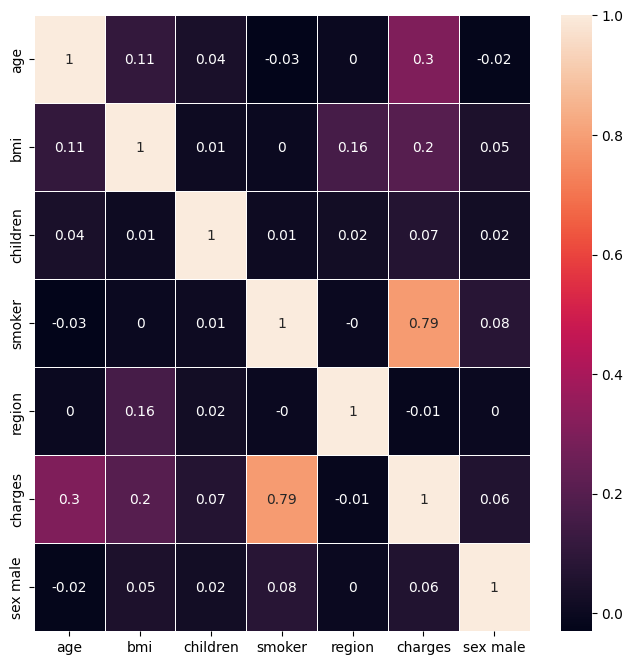

In [ ]:
#analisando correlações
import seaborn as sns

correlation_matrix = insurance_full.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Talvez a região, o numero de filhos e o sexo da pessoa não tenham tanto impacto no resultado pela baixa correlação. Mas vamos testar mantendo dado que já temos poucas colunas.

In [ ]:
insurance_full['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

Fumante é a variável que tem a maior correlação com o valor dos encargos. Podemos ver que há um desequilíbrio na distribuição de valores.
TO-DO Deveríamos minimamente manter o percentual de distribuição dessa variável entre treino e teste

# Modelagem

In [ ]:
from sklearn.model_selection import train_test_split

x = insurance_full.drop(columns=['charges']) # Variáveis características
y = insurance_full['charges'] # O que eu quero prever. (Target)

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#print(len(x_train), "treinamento +", len(x_test), "teste")

Categorizando os valores da coluna Charges. OUTLIERS

Utilizamos a mesa base de cálculo de 1.5 categorizar os valores. Observe que os valores são diferentes e como o valor máximo de custos é maior que 63000 foi feita a divisão por 1,5 onde 40000 que foi usado como um limitador máximo para a categorização.

In [ ]:
# Divida por 1,5 para limitar o número de categorias de renda
# dividindo o valor da coluna "median_income" de cada entrada pelo valor 1,5 e, em seguida, arredondando o resultado para cima usando a função np.ceil() (da biblioteca NumPy).
#Isso cria uma nova coluna chamada "charges_categorizado" no dataset que contém os valores das categorias de renda apósa divisão e arredondamento.

insurance_full["charges_categorizado"] = np.ceil(insurance_full["charges"] / 1.5) # ceil para arredondar valores para cima

# Basicamente, se o valor em "charges_categorizado" for menor que 40000, ele permanece o mesmo; caso contrário, é substituído por 5.
insurance_full["charges_categorizado"].where(insurance_full["charges_categorizado"] < 40000, 5.0, inplace=True)

In [ ]:
insurance_full.describe()

,age,bmi,children,smoker,region,charges,sex male,charges_categorizado
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,1.515695,13270.422265,0.505232,8754.602392
std,14.049960,6.098187,1.205493,0.403694,1.104885,12110.011237,0.500160,7934.909251
min,18.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000,5.000000
25%,27.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000,3146.250000
50%,39.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000,6203.000000
75%,51.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000,10970.250000
max,64.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000,39048.000000


In [ ]:
#Separando os dados por categoria
insurance_full["charges_categorizado"] = pd.cut(insurance_full["charges_categorizado"],
                               bins=[0., 5000, 10000, 15000, 20000., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
#Analisando as categorias
insurance_full["charges_categorizado"].value_counts()

charges_categorizado
1    547
2    436
5    159
3    128
4     68
Name: count, dtype: int64

Amostragem com base nas categorias de custo individual.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit  # Ferramenta para criar conjunto de dados para representar a amostragem.

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(insurance_full, insurance_full["charges_categorizado"]):
    strat_train_set = insurance_full.loc[train_index]
    strat_test_set = insurance_full.loc[test_index]


In [ ]:
# Analisando as proporções da base de treinamento
strat_train_set["charges_categorizado"].value_counts() / len(strat_train_set)

charges_categorizado
1    0.409346
2    0.326168
5    0.118692
3    0.095327
4    0.050467
Name: count, dtype: float64

In [ ]:
# Analisando as proporções da base de teste
strat_test_set["charges_categorizado"].value_counts() / len(strat_test_set)

charges_categorizado
1    0.406716
2    0.324627
5    0.119403
3    0.097015
4    0.052239
Name: count, dtype: float64

In [ ]:
insurance_full["charges_categorizado"].value_counts() / len(insurance_full)

charges_categorizado
1    0.408819
2    0.325859
5    0.118834
3    0.095665
4    0.050822
Name: count, dtype: float64

In [ ]:
insurance_full.head()

,age,bmi,children,smoker,region,charges,sex male,charges_categorizado
0,19,27.900,0,1,3,16884.92400,0,3
1,18,33.770,1,0,2,1725.55230,1,1
2,28,33.000,3,0,2,4449.46200,1,1
3,33,22.705,0,0,1,21984.47061,1,3
4,32,28.880,0,0,1,3866.85520,1,1


In [ ]:
# Removendo o "charges_categorizado" das bases de treino e teste
# O uso do termo set_ é uma convenção para indicar que é uma variável temporária que itera sobre um conjunto de dados (um conjunto de treinamento ou um conjunto de teste).

for set_ in (strat_train_set, strat_test_set):
    set_.drop("charges_categorizado", axis=1, inplace=True)

In [ ]:
strat_train_set

,age,bmi,children,smoker,region,charges,sex male
264,53,38.060,3,0,2,20462.99766,0
1135,50,28.120,3,0,1,11085.58680,0
170,63,41.470,0,0,2,13405.39030,1
465,30,28.380,1,1,2,19521.96820,0
225,55,33.880,3,0,2,11987.16820,1
...,...,...,...,...,...,...,...
115,60,28.595,0,0,0,30259.99556,1
1206,59,34.800,2,0,3,36910.60803,0
965,35,27.100,1,0,3,4746.34400,1
140,34,22.420,2,0,0,27375.90478,1


In [ ]:
charges_x = strat_train_set.drop("charges", axis=1) # apagando a target para a base de treino
charges_x_test = strat_test_set.drop("charges", axis=1) # apagando a target para a base de teste
charges_target = strat_train_set["charges"].copy() #armazenando a target no treino
charges_target_test = strat_test_set["charges"].copy() #armazenando a target no teste

In [ ]:
charges_target_test

204      7147.10500
344     10977.20630
159     19749.38338
14      39611.75770
1247     6059.17300
           ...     
911     33732.68670
537      8825.08600
353     12404.87910
1012    36580.28216
758      5428.72770
Name: charges, Length: 268, dtype: float64

In [ ]:
print(len(charges_x), "treinamento +", len(charges_x_test), "teste")

1070 treinamento + 268 teste


Agora, normalizando os dados para a mesma escala com StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(charges_x)

x_train_scaled = scaler.transform(charges_x)
x_test_scaled = scaler.transform(charges_x_test)

# Treinamento e avaliação do modelo

Testando primeiro com Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, charges_target)

LinearRegression()

In [ ]:
predictions_LR = lin_reg.predict(x_test_scaled)

In [ ]:
predictions_LR

array([ 6270.4821316 , 15684.81549063, 10939.5801453 , 32406.06531721,
        7080.41556503,  9948.11941067,  6902.31114502,  7157.87574205,
       14246.59276466, 13868.64285282,  1526.38389156,  5910.63279531,
       11433.28827438, 26662.1152128 , 34788.91669804,  4086.5340445 ,
         727.90160791,  6351.0753399 ,  8772.6224605 , 33234.72775281,
       12122.65446399, 14848.02911848,  3112.81634932, 27930.90148466,
       33862.82157276,  7129.09358872,  7018.10505401, 38496.09333505,
        5614.70114188, 26381.1426618 , 11955.11054926, 27662.76825135,
         547.08989317, 16165.55312801, 12729.39843879,  7325.29355584,
        3576.60328888, 16366.81243117,  1585.7230102 , 28944.93437132,
        2128.43372118, 12896.80255194,  6252.26711194, 10512.45161003,
        3631.66959347,  4113.55674612, 34064.7324305 , 14550.79393128,
       29882.68950175, 34433.42973166, -1096.2810366 ,  7526.86611013,
       23338.3573785 , 13226.00133064,  8231.11606977, 13291.53559998,
      

# Validação estatística

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Avaliar se os erros não são tão grandes
# penalizamais valores distantes da média

lin_mse = mean_squared_error(charges_target_test, predictions_LR)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
lin_rmse

5658.631762084618

In [ ]:
# erro médio absoluto
lin_mae = mean_absolute_error(charges_target_test, predictions_LR)
lin_mae

4055.7553474052547

In [ ]:
# r2, quanto mais próximo de 1 melhor
r2 = r2_score(charges_target_test, predictions_LR)
print('r²',r2)

r² 0.7581596226083377


Temos um restultado apenas razoável. Seria melhor um resultado mais próximo de 1

In [ ]:
# criando função para calcular o mape
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [ ]:
# Calcular o MAPE
mape_result = calculate_mape(charges_target_test, predictions_LR)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 44.50%


Temos um erro absoluto percentual médio alto, o que indica que o modelo está errando muito e precisa ser melhorado

# Testando com outro modelo - Árvore de decisão

A Decision Tree Regression usa uma estrutura de árvore para modelar a relação entre nossas variáveis de entrada e a variável que queremos prever. Basicamente, a árvore faz várias perguntas sobre os dados e, no final, nos dá um valor previsto. Cada "ramo" da árvore representa uma decisão baseada em uma característica específica, e as "folhas" representam as previsões finais.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=10)
model_dtr.fit(x_train_scaled, charges_target)

DecisionTreeRegressor(max_depth=10)

In [ ]:
predictions_DT = model_dtr.predict(x_test_scaled)

In [ ]:
print("Predictions:", predictions_DT)

Predictions: [14957.74032333 11552.904      10702.6424     51194.55914
  5625.64944211  5138.2567      9118.78557     9118.78557
 13836.30295    13137.8841      2196.4732      4400.982
 10446.29378333 17468.9839     42490.67665     2893.86799545
  2990.88445     7473.9505     11104.7534     35069.37452
 14256.1928     13137.8841      1507.355525   18259.216
 40932.4295      6531.6080975   9788.8659     29523.1656
  3777.8377     33307.5508     11872.17811667 33307.5508
  1841.89854286 13143.83603333 14611.234126    6531.6080975
  6531.6080975  11905.64716091  1841.89854286 36149.4835
  3375.012       9874.4105      3866.8552      3226.70082857
  3906.127       1901.58303333 21758.899075   10767.2724
 34303.1672     32787.45859     1736.49566667  7668.12544941
 20167.33603    30166.61817    18963.17192    11772.05977
  2182.01275     9118.78557     9788.8659      6332.87325385
 19260.021      10446.29378333  3454.373775    1748.774
  9151.67222     9118.78557    15452.26844333  7668.125

In [ ]:
lin_mse = mean_squared_error(charges_target_test, predictions_DT)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6029.061292845817

In [ ]:
decision_tree_mae = mean_absolute_error(charges_target_test, predictions_DT)
decision_tree_mae

2799.470916634052

In [ ]:
decision_tree_r2 = r2_score(charges_target_test, predictions_DT)
print('r²',decision_tree_r2)

r² 0.72546018036041


In [ ]:
# Calcular o MAPE
mape_result = calculate_mape(charges_target_test, predictions_DT)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 32.55%


Tivemos redução nos indicadores de erro, no entanto o r2 se distanciou de 1 em relação à regressão linear. No conjunto, por ter um erro médio absoluto bem menor, talvez este seja mais recomendado.

# Testando com outro modelo - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_forest_model = RandomForestRegressor()

In [ ]:
insurance_full[['age', 'bmi', 'smoker', 'charges', 'children', 'region', 'sex male']]

x = insurance_full[['age', 'bmi', 'smoker', 'children', 'region', 'sex male']]
y = insurance_full['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

k = 3

random_forest_parameters = dict(criterion=['absolute_error', 'squared_error'],
                                max_depth=range(1,10))

grid_random_forest = GridSearchCV(estimator=random_forest_model,
                                  param_grid=random_forest_parameters,
                                  scoring='neg_mean_absolute_error',
                                  cv=k)

grid_random_forest.fit(x_train, y_train)

best_params = grid_random_forest.best_params_

print("Melhores parâmetros:", best_params)

Melhores parâmetros: {'criterion': 'absolute_error', 'max_depth': 5}


In [ ]:
random_forest_model.set_params(criterion=best_params['criterion'],
                               max_depth=best_params['max_depth'])

random_forest_model = random_forest_model.fit(x_train, y_train)

In [ ]:
random_forest_predictions = random_forest_model.predict(x_test)

In [ ]:
random_forest_mae = round(mean_absolute_error(y_test, random_forest_predictions), 2)
random_forest_r2 = round(r2_score(y_test, random_forest_predictions), 2)

print('Mean Absolute Error:', random_forest_mae)
print('R2 score:', random_forest_r2)

Mean Absolute Error: 1795.35
R2 score: 0.87


In [ ]:
import plotly.express as px

results = pd.DataFrame()
results['Model'] = ['Regressão Linear', 'Arvore de Decisão', 'Random Forest']
results['MAE'] = [lin_mae, decision_tree_mae, random_forest_mae]
results['R2'] = [r2, decision_tree_r2, random_forest_r2]

results = results.sort_values('MAE')

mae_figure = px.bar(results, x='MAE', y='Model', color='Model', orientation='h')
mae_figure.update_layout(title="Erro Médio Absoluto (MAE)", width=900, height=300)

iplot(mae_figure)

r2_figure = px.bar(results, x='R2', y='Model', color='Model', orientation='h')
r2_figure.update_layout(title="Valor R2", width=900, height=300)

iplot(r2_figure)